# Load Data

This file was included with the dataset and permitted initially to load the dataset and display one of each class.

It has been modified in order to train and test a Naive Bayesian model.

In [1]:
import glob, os 
from skimage import io, transform, filters, segmentation
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.naive_bayes import GaussianNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.decomposition import PCA
from skimage.color import rgb2gray

### Dataset path

In [2]:
path = "data/images/"
imlist = glob.glob(os.path.join(path, '*.jpg'))

In [3]:
def dataset(file_list, size=(300,180), flattened=False, grayScale=False, filt='sobel'):
    '''
    Function to create a dataset. It will load all the images into a np.array 
    
    Parameters: 
    
    - file_list: List of all the images you want to include in the dataset. 
    - Size : Size of the images, by default is 180x300 which is the original size. 
    - flattened: By default is False. Creates a dataset, but each image get converted into a big vector. 
    
    Output: 
    
    data: it outputs the dataset as a big np array 
    labels : It outputs the binary label. 1 for pollen 0 for non pollen. 
    
    '''
    if type(filt) != str:
        raise ValueError("Incorrect format for filter.")
            
    data = []
    for i, file in enumerate(file_list):
        image = io.imread(file)
        if filt == 'sobel':
            image = filters.sobel(image)
                
        if grayScale:
            image = rgb2gray(image)
        
        if filt == 'chan_vese':
            cv = segmentation.chan_vese(image, mu=0.45, lambda1=0, lambda2=2, tol=1e-3, max_iter=200,
                       dt=0.75, init_level_set="checkerboard", extended_output=True)
            image = cv[1]
        
        image = transform.resize(image, size, mode='constant') # adjust grain
        
        if flattened:
            image = image.flatten()

        data.append(image)

        
    # On Windows, replace path \ character by / :
    # TODO: use os.path.join() or pathlib library instead
    file_list = [f.replace("\\", "/") if "\\" in f else f for f in file_list]
    
    labels = [1 if f.split("/")[-1][0] == 'P' else 0 for f in file_list]
    

    return np.array(data), np.array(labels)

### Large grain

In [4]:
# size = (300, 180) # default resolution
# size = (150, 90)
# size = (100, 60)
# size = (30, 18)
# size = (25, 15)
size = (20, 12)   # preferred resolution
# size = (15, 9)    # too small
nbClasses = 2

### Load the dataset

In [5]:
# Randomise the list of picture now because they are classified by name
np.random.shuffle(imlist)

# Loading may take a few seconds
X,y = dataset(imlist, size, True, True, 'sobel')

### Dataset dimensions

In [6]:
datasetSize = X.shape[0]

# if (flattened=False)
#    X has the following structure: X[imageid, x*y]
# else
#    X has the following structure: X[imageid, y, x, channel]
print('X: ', X.shape)  # data
print('y: ', y.shape)  # target

X:  (714, 240)
y:  (714,)


In [7]:
print('Class 0: ', sum(y==0))
print('Class 1: ', sum(y==1))
print('Total  : ', len(y))
print(y)

Class 0:  345
Class 1:  369
Total  :  714
[0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1
 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1
 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1
 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1
 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1
 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1
 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0
 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1
 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1

### Classes examples

In [8]:
%matplotlib inline

Text(0.5, 1.0, 'img 2 - class 1')

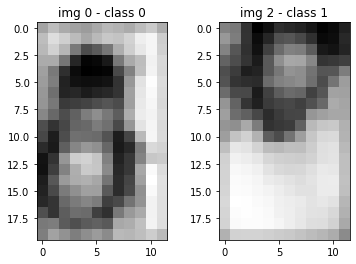

In [9]:
fig, axes = plt.subplots(1,2)

k = np.where(y == 0)[0][0]    # first occurence of class 0
plt.sca(axes[0])
plt.imshow(X[k].reshape(size), cmap="gray")
plt.title('img {} - class {}'.format(k, y[k]))

k = np.where(y == 1)[0][0]    # first occurence of class 1
plt.sca(axes[1])
plt.imshow(X[k].reshape(size), cmap="gray")
plt.title('img {} - class {}'.format(k, y[k]))

### Divide the dataset into training and validation set(s)

In [10]:
def loadSubSets(X, y, ratio_train, ratio_valid):
    '''
    Function to create a dataset. It will load all the images into a np.array
    
    Parameters:
    
    - X : Vector of all the images of the dataset.
    - y : Corresponding binary label vector. 1 for pollen 0 for non pollen.
    - ratio_train : Desired percentage of dataset dedicated to train phase.
    - ratio_valid : Desired percentage of dataset dedicated to valid phase.
    
    Output:

    X_train : training phase images subset
    y_train : training phase label subset.
    X_valid : validation phase images subset
    y_valid : validation phase label subset.
    X_test  : testing phase images subset
    y_test  : testing phase label subset.
    
    '''
    ratio_test = 1 - ratio_train - ratio_valid
    assert(ratio_test > 0)
    
    Ntot   = X.shape[0]
    Ntrain = int(ratio_train*Ntot)
    Nvalid = int(ratio_valid*Ntot)
    Ntest  = Ntot - Ntrain - Nvalid
    X_train = X[0: Ntrain].copy()
    y_train = y[0: Ntrain].copy()
    X_valid = X[Ntrain: Ntrain+Nvalid].copy()
    y_valid = y[Ntrain: Ntrain+Nvalid].copy()
    X_test  = X[-Ntest:].copy()
    y_test  = y[-Ntest:].copy()
    
    return X_train, y_train, X_valid, y_valid, X_test, y_test

In [11]:
# Example usage of previous function
ratio_train = 0.6
ratio_valid = 0.3

X_train, y_train, X_valid, y_valid, X_test, y_test = loadSubSets(X, y, ratio_train, ratio_valid)

In [12]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_valid", X_valid.shape)
print("y_valid", y_valid.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (428, 240)
y_train (428,)
X_valid (214, 240)
y_valid (214,)
X_test (72, 240)
y_test (72,)


## Apply (Gaussian) Naive Bayesian on the training and validation data
### Example without PCA

In [13]:
classifierType = "GAUS"

if classifierType == "GAUS":
    clf = GaussianNB()
if classifierType == "COMP":
    clf = ComplementNB()
if classifierType == "BERN":
    clf = BernoulliNB()
if classifierType == "CATE":
    clf = CategoricalNB()

clf.fit(X_train, y_train)

if classifierType == "GAUS":
    mean1, mean2 = clf.theta_    # used later to display "learned parameters"

y_pred = clf.predict(X_valid)

print("Number of mislabeled points ", (y_valid != y_pred).sum(), "/", X_valid.shape[0], " points" )
print("Score : ~{0:.0%}".format(clf.score(X_valid, y_valid)))

Number of mislabeled points  60 / 214  points
Score : ~72%


0 = non pollen carrying, 1 = pollen carrying, but not sure to which means it correspond..


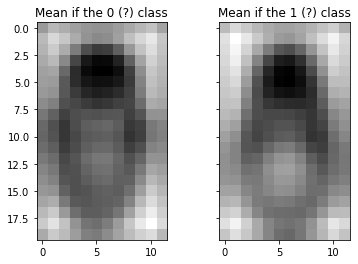

In [14]:
if classifierType == "GAUS":
    # Display "learned parameters"
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.imshow(mean1.reshape(size), cm.gray)
    ax2.imshow(mean2.reshape(size), cm.gray)
    ax1.title.set_text("Mean if the 0 (?) class")
    ax2.title.set_text("Mean if the 1 (?) class")
    print("0 = non pollen carrying, 1 = pollen carrying, but not sure to which means it correspond..")

### With PCA (testing differents n_comp values)

In [15]:
linear_training_score = []
linear_valid_score = []

# For differents values of n_components, realize
# a PCA then a supervised learning of the classes
nComp_range = np.arange(1, X.shape[1], 5)  # TODO: change 5 for a more adapted step ?

for nC in nComp_range:
    preProc = PCA(n_components=nC, copy=True)
    preProc.fit(X_train)
    
    X_train_Transformed = preProc.transform(X_train)
    X_valid_Transformed = preProc.transform(X_valid)
    
    # Supervised learning of classes using a GaussianNB
    clf = GaussianNB()
    
    # Transform the data according to this learned transformation
    clf.fit(X_train_Transformed, y_train)

    # mean1, mean2 = clf.theta_    # too much nbComp to display each mean ? store the best ?
    
    # Compute the scores using clf.score()
    trainscore = clf.score(X_train_Transformed, y_train)
    validscore = clf.score(X_valid_Transformed, y_valid)
    
    linear_training_score.append(trainscore)
    linear_valid_score.   append(validscore)

#### Display test/validation scores graphs according to the PCA comp' number

Text(0.5, 1.0, 'Best score : ~81% obtained with 31 components')

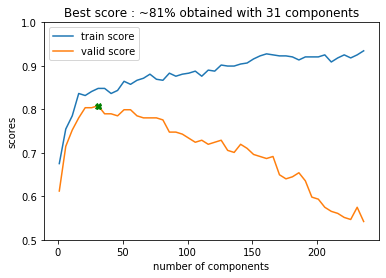

In [16]:
# plot scores depending on the nComp hyper-param
plt.figure()
plt.plot(nComp_range, linear_training_score, label= "train score")
plt.plot(nComp_range, linear_valid_score   , label= "valid score")
plt.xlabel("number of components")
plt.ylabel("scores")
plt.legend()
plt.ylim([0.5,1])

# Display best validation set configuration (without taking into account overfitting)
# TODO: refined it by hand ?
bestIndex = np.argmax(linear_valid_score)
bestNC = nComp_range[bestIndex]
plt.plot(bestNC, linear_valid_score[bestIndex], marker='X', color='green')
plt.title("Best score : ~{0:.0%}".format(linear_valid_score[bestIndex]) + " obtained with " + str(bestNC) + " components")

### TODO: Display test/validation scores graphs according to the ratio or to the grain hyperparameters

TODO: choose only ONE 'hyper-param' in addition to PCA comp because of 2D graph
      while fluctuating parameters and display graphs :
```py
# for (train=40% to train=80%)
#     for (smallGrain to largeGrain)
#         (for (compPCA in range(0 to 375)) ?)
#             fit()
#             predict()
#             plot learning vs. testing curves
```

Display Mean Squared Error in loop ?

(TODO: cross-validation ?) w/ module https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

Try other NB ? see [#Example-without-PCA](./LoadData.ipynb#Example-without-PCA).. Maybe not in loops but manually to selet the proper one ?

### BonusTODO: Implement PCA _(after grain adaptation but before bayesian)_

More "documentation" about PCA

In [17]:
#### TODO: INTEGRATE INTO LOOP ? ####
#####################################

# preProc = PCA(n_components=nc, copy=True)
# preProc.fit(X_train)
# ...
varianceExplained=0.95
preProc = PCA(n_components=varianceExplained) # fix the hyperparameters of this transformation
preProc.fit(X_train)                          # learn on a part and not all the dataset

# Display the number of components retained
print("composantes retenues : " + str(preProc.components_.shape[0]))

composantes retenues : 39


Retained components : 39


(0, 1)

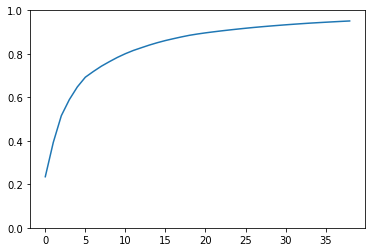

In [18]:
#### TODO: INTEGRATE INTO LOOP ? ####
#####################################

# preProc = PCA(n_components=nc, copy=True)
# preProc.fit(X_train)
# ...
varianceExplained=0.95
preProc = PCA(n_components=varianceExplained) # fix the hyperparameters of this transformation
preProc.fit(X_train)                          # learn on a part and not all the dataset

# Display the number of components retained
print("Retained components : " + str(preProc.components_.shape[0]))

# Displays the cumulative explained variances for all feasible
# n_component choices (with expl_var between 0 and 0.95)
CumulativeExplainedVariance = np.cumsum(preProc.explained_variance_ratio_)
plt.plot(CumulativeExplainedVariance)
plt.ylim([0,1])

MSE totale (Mean Squared Error) 0.0001019307731730477


Text(0.5, 1.0, 'The same bee after(?) "binarization"')

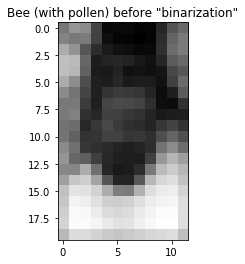

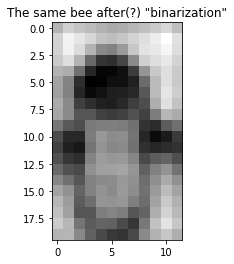

In [19]:
X_train_Transformed = preProc.transform(X_test)

# For an image after "compression" by PCA, calculate the corresponding decompressed image.
# Calculate the decompressed version of the entire train-set.
X_train_Transf_decompressed = preProc.inverse_transform(X_train_Transformed)
diff = X_train_Transf_decompressed - X_test # array of size Nx 64

# Calculate the reconstruction error (root mean square error on the pixels) for that image.
# Calculates the mean square error over the entire train set
totalMeanSquaredError = np.mean(diff**2)
print("MSE totale (Mean Squared Error)", totalMeanSquaredError)


# TODO: Eventually, do this in a function so that we can quickly compare any
#       training example before and after compression/decompression visually.
plt.figure()
n=60       # choose random image in the dataset
plt.imshow(X_train                    [n].reshape(size) , cm.gray)
plt.title("Bee ("+ ("with" if (y[n]==1) else "without" )+ " pollen) before \"binarization\"")
plt.figure()
plt.imshow(X_train_Transf_decompressed[n].reshape(size) , cm.gray)
plt.title("The same bee after(?) \"binarization\"")

Text(0, 0.5, 'error')

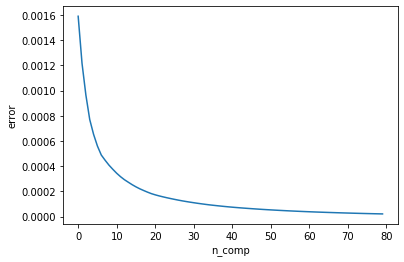

In [20]:
D = X.shape[1]
D = 80
errors = np.zeros(D)
for i, nc in enumerate(range(D)): 
    preProc = PCA(n_components=nc, copy=True)
    preProc.fit(X_train)  # calculating the sklearn passage matrix
    X_train_Transformed = preProc.transform(X_train)
    X_train_Transf_decompressed = preProc.inverse_transform(X_train_Transformed)

    diff = X_train_Transf_decompressed - X_train # array of size Nx 64
    totalMeanSquaredError = np.mean(diff**2)
    errors[i] = totalMeanSquaredError

plt.plot(np.arange(D), errors)
plt.xlabel("n_comp")
plt.ylabel("error")